In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

w[0]: 0.393906  b: -0.031804


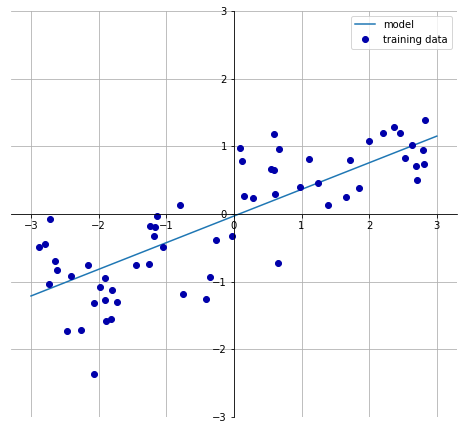

In [2]:
## linear regression
mglearn.plots.plot_linear_regression_wave()

In [4]:
# ordinary least squares

#
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1次元データセットの場合
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [7]:
print("coefficient:", lr.coef_)
print("intercept:", lr.intercept_)

coefficient: [0.39390555]
intercept: -0.031804343026759746


In [8]:
print("training set score:", lr.score(X_train, y_train))
print("test set score:", lr.score(X_test, y_test))

training set score: 0.6700890315075756
test set score: 0.65933685968637


In [9]:
# より複雑なデータセットの場合
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [10]:
# 過剰適合が発生してしまう
print("training set score:", lr.score(X_train, y_train))
print("test set score:", lr.score(X_test, y_test))

training set score: 0.952051960903273
test set score: 0.6074721959665863


In [14]:
# ridge regressionなら複雑度を制御できるので複雑なデータセットでも対応できる
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("training set score:", ridge.score(X_train, y_train))
print("test set score:", ridge.score(X_test, y_test))

training set score: 0.885796658517094
test set score: 0.7527683481744755


In [15]:
# alphaの値を変えてみる
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("training set score:", ridge10.score(X_train, y_train))
print("test set score:", ridge10.score(X_test, y_test))

training set score: 0.7882787115369614
test set score: 0.6359411489177311


In [16]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("training set score:", ridge01.score(X_train, y_train))
print("test set score:", ridge01.score(X_test, y_test))

training set score: 0.9282273685001988
test set score: 0.7722067936479806


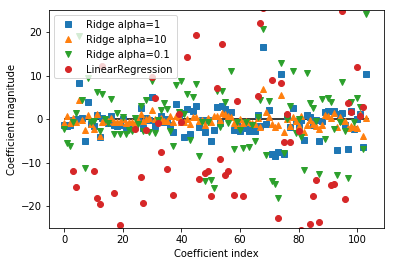

In [19]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

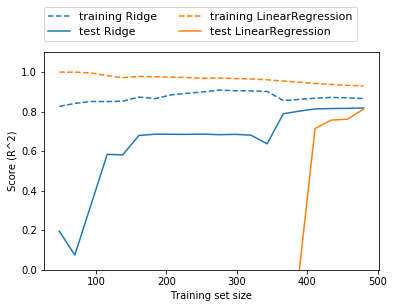

In [20]:
mglearn.plots.plot_ridge_n_samples()